# TCS_Model

Q. Problem statement: Forcasting TCS dataset

Sol: We use two ML algo (REGRESSION) to forcaste i.e, Linear and Random forest regession

In [ ]:
# Dataset Nature:

# Order = 244 rows * 7 cols
# size = 13.5 KB


## Step1: Load_Data

Terminology (Symbols) used in this model:



1.   df = DataFrame
2.   LR = Linear Regression
3.   rf = random forest
4.   MSE = mean square error
5.   pred_val = predicated value
6.  






Load Data

In [3]:
# mout (connect) to G.drive

from google.colab import drive
drive.mount('/content/drive')

In [4]:
import pandas as pd


df = pd.read_csv('/content/TCS.NS_Data set for all trials.csv')

In [6]:
#showing data

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/12/2023,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,6/13/2023,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,6/14/2023,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,6/15/2023,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,6/16/2023,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189
...,...,...,...,...,...,...,...
239,6/4/2024,3700.000000,3745.000000,3591.500000,3715.000000,3715.000000,3395997
240,6/5/2024,3716.000000,3783.800049,3700.000000,3746.449951,3746.449951,2799670
241,6/6/2024,3781.000000,3839.899902,3741.500000,3830.399902,3830.399902,4328036
242,6/7/2024,3837.300049,3915.000000,3837.300049,3893.949951,3893.949951,4552445


In [5]:
# prompt: Using dataframe df: df

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       244 non-null    float64
 2   High       244 non-null    float64
 3   Low        244 non-null    float64
 4   Close      244 non-null    float64
 5   Adj Close  244 non-null    float64
 6   Volume     244 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


## Step2: Data_Preparation

Data separation on X and Y

In [20]:
# Y axis  hm JISKO - PREDICATE karna h

Y = df['Volume']

Y

0      2324605
1      1371928
2      1658544
3      2273810
4      4156189
        ...   
239    3395997
240    2799670
241    4328036
242    4552445
243    1733941
Name: Volume, Length: 244, dtype: int64

In [18]:
# X axis :   (expect Volume  and date)  rest all
# delete date and volume column

X = df.drop('Volume', axis = 1)

X = df.drop('Date', axis = 1)

X

,Open,High,Low,Close,Adj Close,Volume
0,3215.000000,3254.399902,3211.000000,3246.899902,3168.457764,2324605
1,3260.000000,3265.000000,3239.000000,3243.699951,3165.335205,1371928
2,3243.699951,3255.850098,3225.850098,3251.050049,3172.507813,1658544
3,3245.300049,3247.449951,3210.000000,3216.300049,3161.939697,2273810
4,3197.000000,3199.399902,3156.000000,3174.899902,3121.239014,4156189
...,...,...,...,...,...,...
239,3700.000000,3745.000000,3591.500000,3715.000000,3715.000000,3395997
240,3716.000000,3783.800049,3700.000000,3746.449951,3746.449951,2799670
241,3781.000000,3839.899902,3741.500000,3830.399902,3830.399902,4328036
242,3837.300049,3915.000000,3837.300049,3893.949951,3893.949951,4552445


## Step3: Data_Splitting

In [21]:
# splitting data

from sklearn.model_selection import train_test_split

# we take random state = 100

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)



In [22]:
# see X tain in our dataset

X_train


,Open,High,Low,Close,Adj Close,Volume
29,3381.000000,3413.449951,3372.100098,3394.750000,3346.051758,1680132
42,3450.000000,3464.899902,3430.050049,3442.100098,3392.722412,1096701
115,3481.000000,3518.000000,3475.800049,3513.750000,3472.306152,1441634
165,4130.000000,4159.600098,4105.549805,4120.700195,4090.966309,1013716
222,3962.000000,3971.000000,3910.050049,3960.199951,3931.624268,1726486
...,...,...,...,...,...,...
87,3530.000000,3534.149902,3503.350098,3507.050049,3456.740723,1672065
103,3390.100098,3391.500000,3342.050049,3347.449951,3307.967529,2112352
67,3567.850098,3607.350098,3562.449951,3598.300049,3546.681885,2952897
24,3510.000000,3549.899902,3477.050049,3491.699951,3432.684570,2743228


In [23]:
X_test

,Open,High,Low,Close,Adj Close,Volume
65,3571.100098,3588.850098,3545.000000,3567.850098,3516.668701,1754929
59,3420.000000,3447.000000,3405.149902,3429.350098,3380.155518,1501842
191,3986.000000,4018.000000,3960.199951,3970.899902,3942.246826,1817913
111,3500.000000,3532.649902,3481.100098,3530.149902,3488.512451,1798051
112,3530.000000,3544.000000,3500.000000,3508.250000,3466.870850,2729804
161,3997.000000,4149.899902,3990.000000,4136.000000,4106.155762,4474396
150,3898.000000,3908.800049,3862.000000,3902.600098,3856.569824,2239110
160,3983.000000,4022.000000,3962.100098,3973.300049,3944.629639,1691523
99,3382.000000,3387.899902,3344.300049,3350.899902,3311.376709,1402598
83,3650.000000,3650.000000,3605.000000,3609.899902,3558.115234,2426417


In [24]:
Y_train

29     1680132
42     1096701
115    1441634
165    1013716
222    1726486
        ...   
87     1672065
103    2112352
67     2952897
24     2743228
8      1529603
Name: Volume, Length: 195, dtype: int64

In [25]:

Y_test



65     1754929
59     1501842
191    1817913
111    1798051
112    2729804
161    4474396
150    2239110
160    1691523
99     1402598
83     2426417
163    2345173
31     1066803
88     1408245
85     2890357
185    4039801
182    1744204
69     1649396
97     1563475
81     4233074
190    8931209
46     1843241
142    1067805
239    3395997
152    2618854
125    3850968
204    2101965
26     2405370
221    1247685
209    2957749
201    1636819
64     4476016
218    2962234
3      2273810
230    1311168
32     1701769
96      999811
212    1317312
140    3598144
224     931326
41     1794589
110    1807236
128    2521612
186    2837260
238    2156773
75     1755753
214    2039178
19     1407431
210    1728883
62     1518917
Name: Volume, dtype: int64

## Step4: Model_Building

## Training model using **LinearR**

### S (i)Linear Regression

In [26]:
# doing regression LINEAR

from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()

# fitting data
LinReg.fit(X_train, Y_train)

LinearRegression()

Applying the model to make a predication

### S (ii) Make Predication

In [27]:
# predicating

Y_LR_train_pred = LinReg.predict(X_train)

Y_LR_test_pred = LinReg.predict(X_test)

In [28]:
# printing predicated value

print(Y_LR_train_pred, Y_LR_test_pred)

[ 1680132.  1096701.  1441634.  1013716.  1726486.  1375579.  1841538.
  6306101.  1574996.  1188200.  4585146.  1158046.  1411621.  1803075.
  2459358.   863542.  1656681.  1191144.  2600090.  1091582.  1172141.
  1193648.  2026351.  2236866.  2941975.  1526904.  1777909.  1541134.
  1801993.  2142666.  2302538.  1569676.  1645987.  3770223.  1432672.
  2599399.  1634225.  1625213.  3458696.  3394637.  1371928.  2205154.
  1948148.  2799670.   772291.  2491044.  1285231.  2765804.  1481211.
  4354821.  3373143.  8531230.  1110693.  1102503.   944517.  1338557.
  1726062.  6813450.  1277950.  1190425.  1896572.  2062112.  3829582.
  3290396.  1293976.  3772719.  2856271.  1733941.  1978803.  1110172.
  2657709.  1518537.  4200329.  2203078.  2304068.  1848148.  2053831.
  1575872.  1453008.  1956167.  1514545.  1328445.  2538072.  2095742.
  4311783.  1876992.  1152881.  1058317.  1853889.  3266235.  1641155.
  3440925.  1528452.  1515240.  1119505.  1330046.  2982052.  1307556.
   992

In [29]:
# Y ka predicated value

print("Y LR test predicate", Y_LR_test_pred)

Y LR test predicate [1754929. 1501842. 1817913. 1798051. 2729804. 4474396. 2239110. 1691523.
 1402598. 2426417. 2345173. 1066803. 1408245. 2890357. 4039801. 1744204.
 1649396. 1563475. 4233074. 8931209. 1843241. 1067805. 3395997. 2618854.
 3850968. 2101965. 2405370. 1247685. 2957749. 1636819. 4476016. 2962234.
 2273810. 1311168. 1701769.  999811. 1317312. 3598144.  931326. 1794589.
 1807236. 2521612. 2837260. 2156773. 1755753. 2039178. 1407431. 1728883.
 1518917.]


###  S (iii): Evalute_Model_Perf

In [ ]:
# Prof == Performance

In [30]:
Y_train

29     1680132
42     1096701
115    1441634
165    1013716
222    1726486
        ...   
87     1672065
103    2112352
67     2952897
24     2743228
8      1529603
Name: Volume, Length: 195, dtype: int64

In [31]:
# Y_train and Y predicated value se compare karge

Y_LR_train_pred

array([ 1680132.,  1096701.,  1441634.,  1013716.,  1726486.,  1375579.,
        1841538.,  6306101.,  1574996.,  1188200.,  4585146.,  1158046.,
        1411621.,  1803075.,  2459358.,   863542.,  1656681.,  1191144.,
        2600090.,  1091582.,  1172141.,  1193648.,  2026351.,  2236866.,
        2941975.,  1526904.,  1777909.,  1541134.,  1801993.,  2142666.,
        2302538.,  1569676.,  1645987.,  3770223.,  1432672.,  2599399.,
        1634225.,  1625213.,  3458696.,  3394637.,  1371928.,  2205154.,
        1948148.,  2799670.,   772291.,  2491044.,  1285231.,  2765804.,
        1481211.,  4354821.,  3373143.,  8531230.,  1110693.,  1102503.,
         944517.,  1338557.,  1726062.,  6813450.,  1277950.,  1190425.,
        1896572.,  2062112.,  3829582.,  3290396.,  1293976.,  3772719.,
        2856271.,  1733941.,  1978803.,  1110172.,  2657709.,  1518537.,
        4200329.,  2203078.,  2304068.,  1848148.,  2053831.,  1575872.,
        1453008.,  1956167.,  1514545.,  1328445., 

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

#for train
LR_train_MSE = mean_squared_error(Y_train, Y_LR_train_pred)
LR_train_r2 = r2_score(Y_train, Y_LR_train_pred)

#test ke liye
LR_test_MSE = mean_squared_error(Y_test, Y_LR_test_pred)
LR_test_r2 = r2_score(Y_test, Y_LR_test_pred)

In [33]:
LR_train_MSE

7.881315792298474e-20

In [34]:
print("LR MSE (Train):", LR_train_MSE)
print("LR R2 (Train):", LR_train_r2)

print("LR MSE (Test):", LR_test_MSE)
print("LR R2 (Test):", LR_test_r2)

LR MSE (Train): 7.881315792298474e-20
LR R2 (Train): 1.0
LR MSE (Test): 1.0786705287483335e-19
LR R2 (Test): 1.0


In [35]:
# LR RESULT

LR_results = pd.DataFrame(['Linear Regression', LR_train_MSE, LR_train_r2, LR_test_MSE, LR_test_r2]).transpose()

#renaming the column
LR_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [36]:
LR_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.0,1.0,0.0,1.0


## Training Model from **Random Forest**

### S (i): Training

In [38]:
# applying Random forest algorithm

from sklearn.ensemble import RandomForestRegressor

# we consider max_depth = 2, random state = 100

rf = RandomForestRegressor(max_depth = 2, random_state = 100)

#train the model
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### S (ii): Applying model to pred

In [52]:
Y_rf_train_pred = rf.predict(X_train)

Y_rf_test_pred = rf.predict(X_test)

In [53]:
# pred using Random forest

print(Y_rf_train_pred, Y_rf_test_pred)

[1550118.67412278 1439676.41681283 1439676.41681283 1439676.41681283
 1564630.33684613 1439676.41681283 1756638.36878572 6294335.89106146
 1439676.41681283 1439676.41681283 3858795.82053648 1439676.41681283
 1439676.41681283 1684594.12456999 2455725.52139212 1439676.41681283
 1543340.62982333 1439676.41681283 2590398.04484909 1439676.41681283
 1439676.41681283 1439676.41681283 2029907.09032578 2124033.96236577
 2790358.74262724 1439676.41681283 1651375.94047656 1439676.41681283
 1684594.12456999 2062808.30802229 2163092.84981198 1439676.41681283
 1543340.62982333 3764832.6704891  1439676.41681283 2590398.04484909
 1536215.9183996  1536215.9183996  3568958.24803416 3568958.24803416
 1439676.41681283 2124033.96236577 2009682.1754216  2729299.00281465
 1439676.41681283 2473552.88926902 1439676.41681283 2729299.00281465
 1439676.41681283 3858795.82053648 3548801.66912893 7208606.12016476
 1439676.41681283 1439676.41681283 1439676.41681283 1439676.41681283
 1564630.33684613 6372870.01248173

### S (iii): Evalute Perfomance

We will perform the model on the basis of Mean Square error and square root score.

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

#for train
rf_train_MSE = mean_squared_error(Y_train, Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)

#test ke liye
rf_test_MSE = mean_squared_error(Y_test, Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

In [55]:
print("RF MSE (Train):",rf_train_MSE)
print("RF R2 (Train):", rf_train_r2)

print("RF MSE (Test):", rf_test_MSE)
print("RF R2 (Test):", rf_test_r2)

RF MSE (Train): 83994380039.10103
RF R2 (Train): 0.9471549431137221
RF MSE (Test): 62409196423.42408
RF R2 (Test): 0.9641557475541528


In [56]:
# RF RESULT

rf_results = pd.DataFrame(['Random Forest', rf_train_MSE, rf_train_r2, rf_test_MSE, rf_test_r2]).transpose()

#renaming the column
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [49]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,83994380039.101028,0.947155,62409196423.42408,0.964156


# Step5: Model Comparison

In [57]:
df_models = pd.concat([LR_results, rf_results], axis = 0).reset_index(drop = True)

#show model
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.0,1.0,0.0,1.0
1,Random Forest,83994380039.101028,0.947155,62409196423.42408,0.964156


In [58]:
# indexing, drop se hm unwnted index ko delete kar diye h

df_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.0,1.0,0.0,1.0
1,Random Forest,83994380039.101028,0.947155,62409196423.42408,0.964156


# Step6: **Visualization of Pred results**

Text(0.5, 0, 'Experimental Volume')

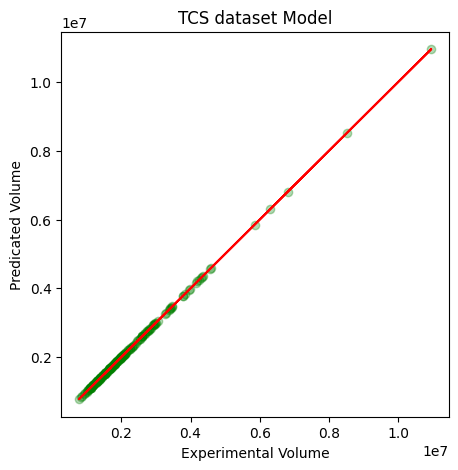

In [62]:
import matplotlib.pyplot as plt
import numpy as np


#scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(x = Y_train, y = Y_LR_train_pred, c = "green", alpha = 0.3)

z = np.polyfit(Y_train, Y_LR_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y_train, p(Y_train), 'red')

plt.title("TCS dataset Model")
plt.ylabel("Predicated Volume")
plt.xlabel("Experimental Volume")

In [ ]:

# Conclusion

# In this case, RF gives (96.4156 %) more optimum than LR